# Road Surface Condition Classification

download tensorflow and matplotlib via ```!pip install tensorflow matplotlib```

In [4]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached nu


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\hp\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [6]:
!pip list
#for checking of the packages

Package                   Version
------------------------- -----------
absl-py                   2.3.1
anyio                     4.12.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.1
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.3
bleach                    6.3.0
certifi                   2025.11.12
cffi                      2.0.0
charset-normalizer        3.4.4
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
flatbuffers               25.9.23
fonttools                 4.61.0
fqdn                      1.5.1
gast                      0.7.0
google-pasta   

In [8]:
import tensorflow as tf
import os

In [9]:
# Avoid OOM (Out Of Memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [22]:
import cv2
data_dir = 'data'
os.listdir(os.path.join(data_dir))
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            if img is None:
                print('Image is corrupt or not readable: {}'.format(image_path))
                os.remove(image_path)
                continue
            ext = image.split('.')[-1].lower()
            if ext not in image_exts:
                print('Image extension not in list: {}'.format(image_path))
                os.remove(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 3281 files belonging to 3 classes.


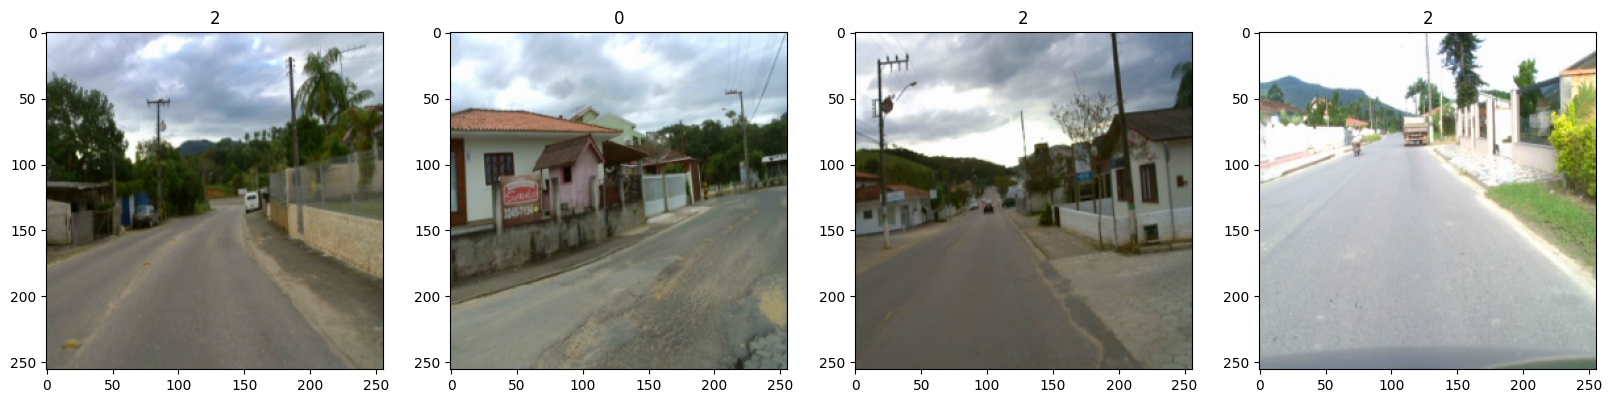

In [28]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [29]:
data = data.map(lambda x,y: (x/255, y))

In [30]:
data.as_numpy_iterator().next()

(array([[[[0.24425551, 0.30307904, 0.11876532],
          [0.23088235, 0.2875    , 0.11862745],
          [0.2014859 , 0.25638786, 0.09952512],
          ...,
          [0.18304227, 0.2065717 , 0.04970895],
          [0.27709866, 0.30577514, 0.1574908 ],
          [0.27207413, 0.30736825, 0.17011335]],
 
         [[0.2382353 , 0.29852942, 0.10392157],
          [0.23340993, 0.29108456, 0.11357231],
          [0.20231311, 0.25795037, 0.09373468],
          ...,
          [0.25225183, 0.27578124, 0.1203891 ],
          [0.2415288 , 0.27117035, 0.12339155],
          [0.22138481, 0.25888482, 0.12089461]],
 
         [[0.24477635, 0.311443  , 0.07222733],
          [0.24520527, 0.30746016, 0.09250919],
          [0.2278799 , 0.28670344, 0.090625  ],
          ...,
          [0.2522978 , 0.2758272 , 0.1268076 ],
          [0.19018076, 0.22400428, 0.07841606],
          [0.19857536, 0.2456342 , 0.10445772]],
 
         ...,
 
         [[0.40096506, 0.4205729 , 0.4480239 ],
          [0.39725

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [32]:
train_size

72

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\ops\nn.py:946: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 269ms/step - accuracy: 0.5955 - loss: -25918.5410 - val_accuracy: 0.6203 - val_loss: -176227.0781
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 283ms/step - accuracy: 0.5955 - loss: -3886397.2500 - val_accuracy: 0.6109 - val_loss: -15744490.0000
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 339ms/step - accuracy: 0.5903 - loss: -93632104.0000 - val_accuracy: 0.6359 - val_loss: -230488912.0000
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 32s 439ms/step - accuracy: 0.5955 - loss: -691297472.0000 - val_accuracy: 0.6156 - val_loss: -1523685376.0000
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 517ms/step - accuracy: 0.5942 - loss: -2890962944.0000 - val_accuracy: 0.6109 - val_loss: -5492024832.0000
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - accuracy: 0.5938 - loss: -8964141056.0000 - val_accuracy: 0.6187 - val_loss: -12045566976.0000
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 521ms/step - accuracy: 0.5924 - loss: -23728887808.0000 - val_accuracy: 0.6328 - val_loss: -

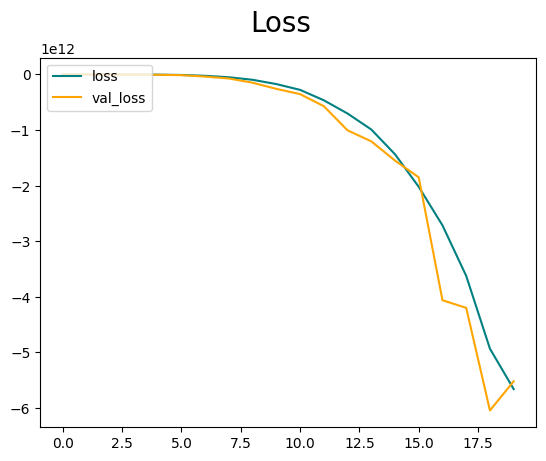

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

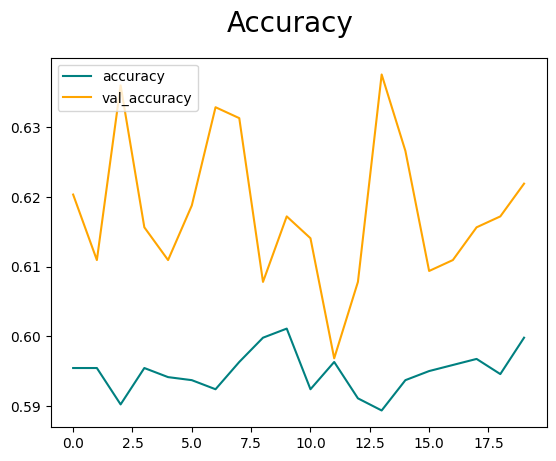

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\ops\nn.py:946: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
tf.Tensor(0.859375, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.621875, shape=(), dtype=float32)


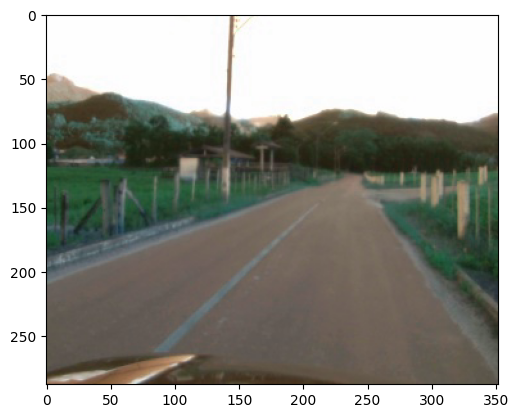

In [55]:
img = cv2.imread('000000031.png')

plt.imshow(img)
plt.show()

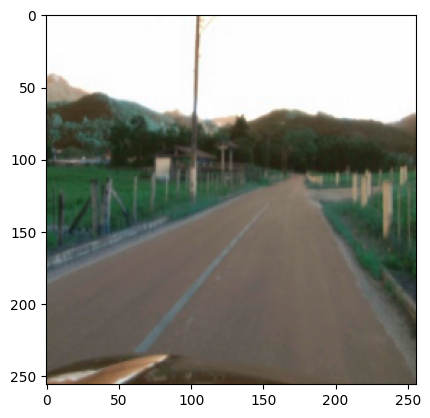

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


array([[1.]], dtype=float32)